In [1]:
import pandas as pd
import altair as alt

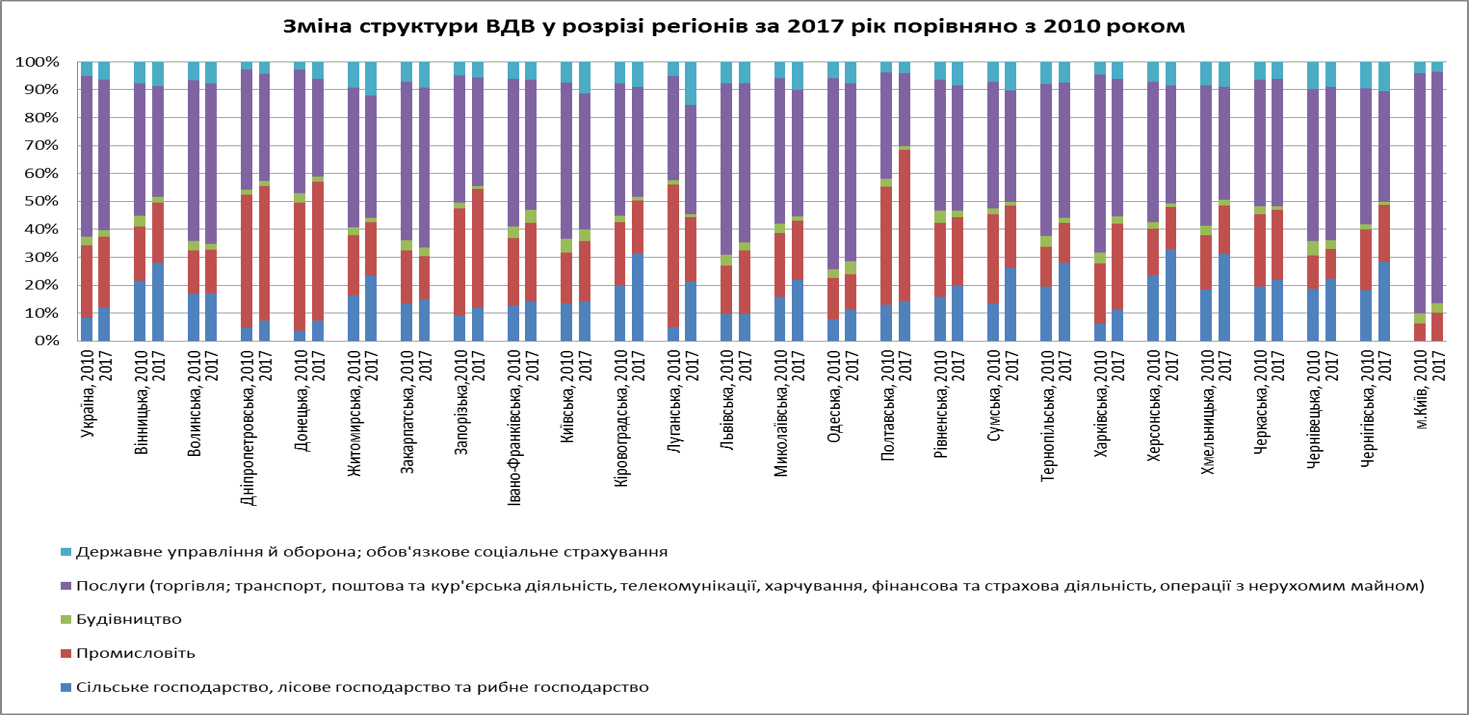

## Проблеми даної візуалізації

- Велика кількість і густина стовпців, що робить пошук потрібної інформації довгим і некомфортним
- Кольорова схема, через яку графік викликає дискомфорт для ока, плюс через це теж важко швидко зчитати потрібну інформацію
- Вертикальні підписи на осі X, що теж ускладнює швидкість зчитування інформації


## Власний варіант візуалізації

### Варіант 1

В даному варіанті можна інтерактивно обрати сферу по якій відображається статистика. Це розгружає графік, пропадає проблема з кольорами та занадто великою щільністю. Також області тепер відображаються по горизонталі і легко читаються.

In [2]:
df = pd.read_excel("1.4_02.xlsx", engine='openpyxl')

In [3]:
df[["region", "year"]] = df['Регіон, рік'].str.split(',', expand=True)
df.drop("Регіон, рік", axis=1, inplace=True)

In [4]:
df = df.melt(id_vars = ['region', 'year'], var_name = 'category')

In [7]:
df.head()

,region,year,category,value
0,Україна,2010,сільське господарство,8.3
1,Україна,2017,сільське господарство,12.1
2,Вінницька,2010,сільське господарство,21.6
3,Вінницька,2017,сільське господарство,28.1
4,Волинська,2010,сільське господарство,16.9


In [8]:
df['year'] = df['year'].astype('int')

In [9]:
df = df.sort_values("region")

In [10]:
df_1 = df[:130]
df_2 = df[130:]

In [11]:
input_dropdown = alt.binding_select(options=['сільське господарство','промисловість','будівництво', "послуги", "державне управління"], name='Сфера ')
selection = alt.selection_single(fields=['category'], bind=input_dropdown)


part_1 = alt.Chart(df_1).mark_bar().encode(
    x=alt.X('year:N', title="рік"),
    y=alt.Y('value:Q', title="", axis=alt.Axis(labelExpr="datum.value + ' %'")),
    color=alt.Color('year:N', title="рік"),
    column=alt.Column('region:N', title="регіон")
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=45
)

part_2 = alt.Chart(df_2).mark_bar().encode(
    x=alt.X('year:N', title="рік"),
    y=alt.Y('value:Q', title="", axis=alt.Axis(labelExpr="datum.value + ' %'")),
    color=alt.Color('year:N', title="рік"),
    column=alt.Column('region:N', title="регіон")
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=50
)

alt.vconcat(part_1, part_2).properties(
 title = alt.TitleParams(
        text = 'Зміна структури ВДВ у розрізі регіонів. Порівняння 2010 та 2017 років',
        anchor = "middle"
    ))

alt.VConcatChart(...)

### Варіант 2

Також спробував горизонтальний bar chart. Ця варіант здався мені кращим, оскільки візуально легше знайти та асоціювати область з графіками. Проте недоліком цього та попереднього варіанів є те, що в один момент присутня інформація лише про одну сферу. Тоді як оригінальний графік, мабуть таки мав на меті продемонструвати не лише зміну в кожній сфері, а й загальне відсоткове співвідношення. Тому я розвинув та фіналізував візуалізацію в 3 варіанті.

In [12]:
df = df.sort_values("region")

In [13]:
df_1 = df[:130]
df_2 = df[130:]

In [14]:
input_dropdown = alt.binding_select(options=['сільське господарство','промисловість','будівництво', "послуги", "державне управління"], name='Сфера ')
selection = alt.selection_single(fields=['category'], bind=input_dropdown)


part_1 = alt.Chart(df_1).mark_bar().encode(
    y=alt.Y('year:N', title=""),
    x=alt.X('value:Q', title="", axis=alt.Axis(labelExpr="datum.value + ' %'")),
    color=alt.Color('year:N', title=""),
    row=alt.Row('region:N', title="регіон",  header=alt.Header(labelAngle=0, labelAlign='left'))
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=250,
    height=25
)

part_2 = alt.Chart(df_2).mark_bar().encode(
    y=alt.Y('year:N', title=""),
    x=alt.X('value:Q', title="", axis=alt.Axis(labelExpr="datum.value + ' %'")),
    color=alt.Color('year:N', title=""),
    row=alt.Row('region:N', title="",  header=alt.Header(labelAngle=0, labelAlign='left'))
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=250,
    height=25
)


alt.hconcat(part_1, part_2).properties(title = alt.TitleParams(
        text = 'Зміна структури ВДВ у розрізі регіонів. Порівняння 2010 та 2017 років',
        anchor = "middle"
    ),)

alt.HConcatChart(...)

## Варіант 3

Отже, в фінальному варіанті взяв за основу горизонтальні bar charts, оскільки так, на мою думку, легше знайти і зчитати інформацію по кожній з областей. 

Назви облайстей у цій реалізації розташовані горизонтально і їх легко прочитати та повязати з графіком розташованим поруч справа.

Завдяки тому. що візуалізація розділена на 2 стовпці, самі смуги вдалось зробити дещо ширшими, що краще сприймається.

Також дані по різних сферах посортовані в порядку спадання, а при наведенні на показуєтсья відсотокове значення. Таким чином легше порівняти дані між 2010 і 2017 роками та зрозуміти їх зміну.
 
Використав кольорову схему, яка не містить таких контрастних кольорів як на оригіналі, тому візуально сприймається набагато комфортніше.

Отже, дана візуалізація виправили практично всі проблеми, які я виділив в оригінальній.

In [15]:
df = df.sort_values("region")

In [16]:
df_1 = df[:130]
df_2 = df[130:]

In [17]:
part_1 = alt.Chart(df_1).mark_bar().encode(
    y=alt.Y('year:N', title=""),
    x=alt.X('value:Q', title="", sort=['послуги', 'промисловість', 'сільське господарство', 'будівництво', 'державне управління'], axis=alt.Axis(labelExpr="datum.value + ' %'")),
    color = alt.Color('category:N', sort=['послуги', 'промисловість', 'сільське господарство', 'будівництво', 'державне управління'], scale=alt.Scale(range=['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3'])),
    tooltip = alt.Tooltip("value:Q"),
    row=alt.Row('region:N', title="регіон",  header=alt.Header(labelAngle=0, labelAlign='left')),
    order=alt.Order('value', sort='descending')
).properties(height=30,  width=250)

part_2 = alt.Chart(df_2).mark_bar().encode(
    y=alt.Y('year:N', title=""),
    x=alt.X('value:Q', title="", sort=['послуги', 'промисловість', 'сільське господарство', 'будівництво', 'державне управління'], axis=alt.Axis(labelExpr="datum.value + ' %'")),
    color = alt.Color('category:N', sort=['послуги', 'промисловість', 'сільське господарство', 'будівництво', 'державне управління'], scale=alt.Scale(range=['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3'])),
    tooltip = alt.Tooltip("value:Q"),
    row=alt.Row('region:N', title="",  header=alt.Header(labelAngle=0, labelAlign='left')),
    order=alt.Order('value', sort='descending')

).properties(height=30, width=250)


In [18]:
alt.hconcat(part_1, part_2).properties(title = alt.TitleParams(
        text = 'Зміна структури ВДВ у розрізі регіонів. Порівняння 2010 та 2017 років',
        anchor = "middle"
    ),)

alt.HConcatChart(...)